In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from kid_readout.interactive import *

INFO     2017-09-20 09:15:12,235 - kid_readout.<module>:13  kid_readout logging setup with default stream handler


In [3]:
ri = Roach2Baseband()

INFO     2017-09-20 09:15:39,808 - kid_readout.roach.interface.initialize:447  Loaded ROACH state from /data/readout/r2kid_config.npz
INFO     2017-09-20 09:15:39,813 - kid_readout.roach.interface.initialize:477  Reinitializing system
INFO     2017-09-20 09:15:39,946 - kid_readout.roach.interface.initialize:484  Programming r2bb2xpfb14mcr25_2016_Oct_01_2233.bof
INFO     2017-09-20 09:15:43,600 - kid_readout.roach.interface.set_fft_gain:320  Set FFT gain integer to 4.
INFO     2017-09-20 09:15:45,614 - kid_readout.roach.interface.initialize:501  Requested sampling rate 512.0 MHz. Estimated sampling rate 513.0 MHz
INFO     2017-09-20 09:15:49,113 - kid_readout.roach.r2baseband.initialize:78  Succesfully recalibrated QDR


In [4]:
ri.initialize(use_config=False)  # Force the roach to be freshly initialized

INFO     2017-09-20 09:17:04,582 - kid_readout.roach.interface.initialize:477  Reinitializing system
INFO     2017-09-20 09:17:04,714 - kid_readout.roach.interface.initialize:484  Programming r2bb2xpfb14mcr25_2016_Oct_01_2233.bof
INFO     2017-09-20 09:17:05,293 - kid_readout.roach.interface.set_fft_gain:320  Set FFT gain integer to 4.
INFO     2017-09-20 09:17:07,308 - kid_readout.roach.interface.initialize:501  Requested sampling rate 512.0 MHz. Estimated sampling rate 513.0 MHz
INFO     2017-09-20 09:17:10,752 - kid_readout.roach.r2baseband.initialize:78  Succesfully recalibrated QDR


The ROACH interface initialized the valon to 512 MHz as recommended for this desingn. We can directly change the valon frequency if desired (but this is not recommended)

In [7]:
ri.adc_valon.set_frequency_a(100.0) # set it to 100 MHz

True

In [8]:
ri.r.est_brd_clk() # Check the FPGA frequency. Since 100 MHz is not supported
# so the result is garbage (ideally est_brd_clk should return half of the valon frequency)

334.7519765

In [10]:
ri.initialize(use_config=False)

INFO     2017-09-20 09:21:15,047 - kid_readout.roach.interface.initialize:477  Reinitializing system
INFO     2017-09-20 09:21:15,177 - kid_readout.roach.interface.initialize:484  Programming r2bb2xpfb14mcr25_2016_Oct_01_2233.bof
INFO     2017-09-20 09:21:15,769 - kid_readout.roach.interface.set_fft_gain:320  Set FFT gain integer to 4.
INFO     2017-09-20 09:21:17,786 - kid_readout.roach.interface.initialize:501  Requested sampling rate 512.0 MHz. Estimated sampling rate 513.0 MHz
INFO     2017-09-20 09:21:21,157 - kid_readout.roach.r2baseband.initialize:78  Succesfully recalibrated QDR


In [25]:
ri.set_tone_freqs(np.array([10.0]),nsamp=2**17)

array([ 10.])

In [17]:
x,y = ri.get_raw_adc()

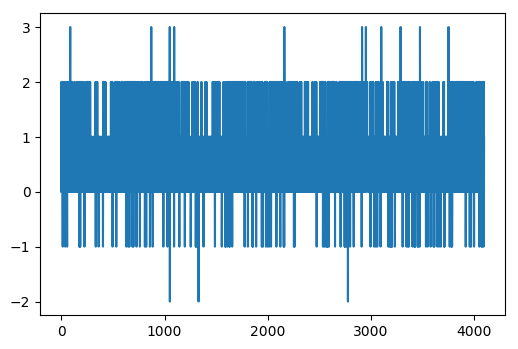

In [18]:
plot(x)

In [19]:
ri.set_loopback(True)

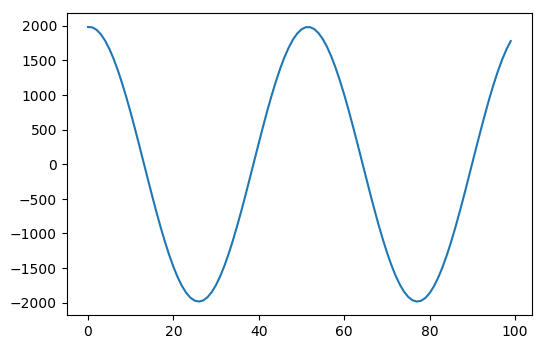

In [26]:
x,y = ri.get_raw_adc()
plot(x[:100])

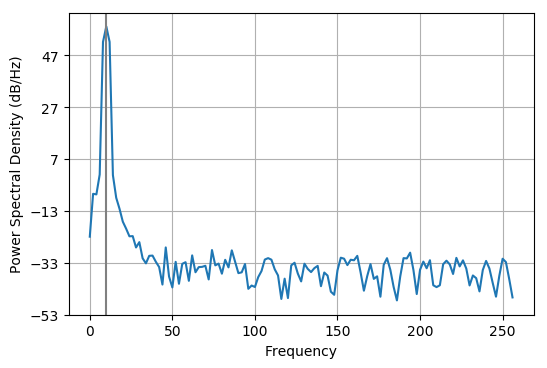

In [30]:
psd(x,Fs=512);
axvline(10,color='gray')

In [27]:
x.min()

-1984.0

In [28]:
x.max()

1983.0

In [31]:
ri.set_tone_freqs(np.array([100.0]),nsamp=2**17)

array([ 100.])

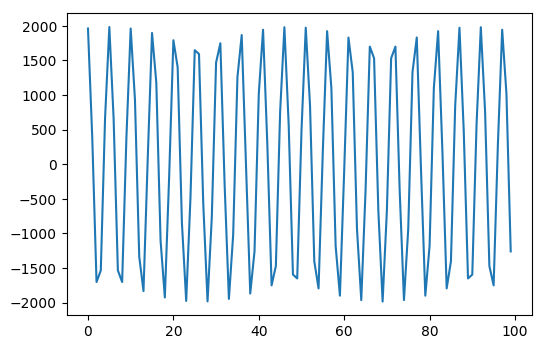

In [32]:
x,y = ri.get_raw_adc()
plot(x[:100])

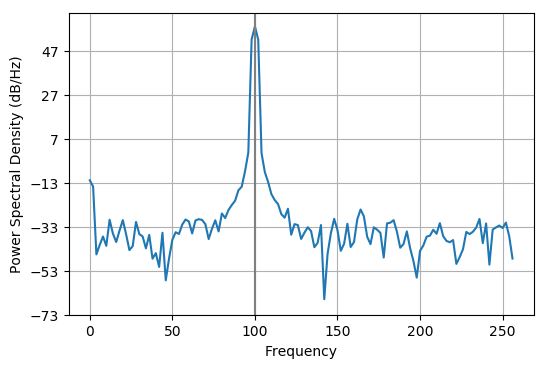

In [34]:
psd(x,Fs=512);
axvline(100,color='gray')

In [35]:
ri.set_tone_freqs??

In [39]:
ri.fs/2**17  # tone frequency resolution is Fs / nsamp

0.00390625

In [40]:
2**17/(512e6)

0.000256

In [41]:
1/512e6

1.953125e-09

In [46]:
512e6/2**21

244.140625

In [47]:
nsamp = 256
t = np.arange(nsamp)
x = np.sin(2*np.pi*t/nsamp)

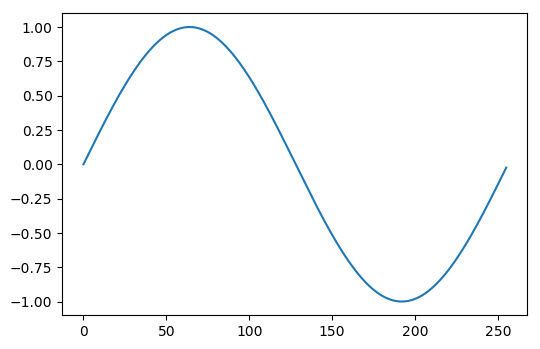

In [48]:
plot(t,x)

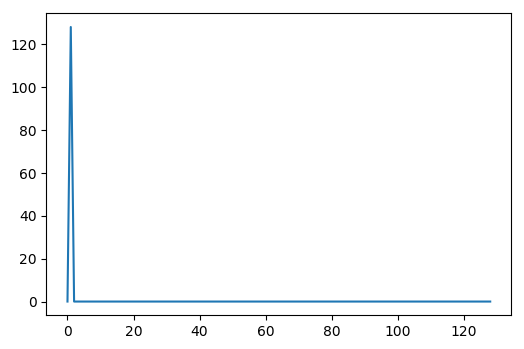

In [50]:
plot(np.abs(np.fft.rfft(x)))

In [51]:
nsamp = 256
t = np.arange(nsamp)
x2 = np.sin(1.1*2*np.pi*t/nsamp)

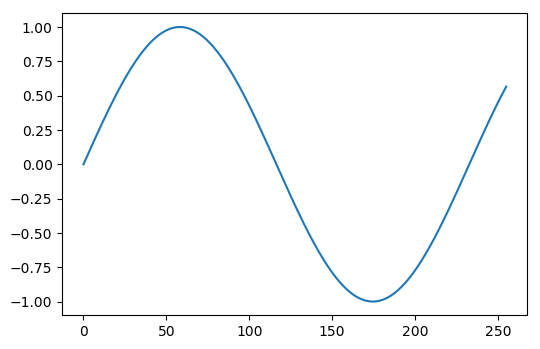

In [52]:
plot(t,x2)

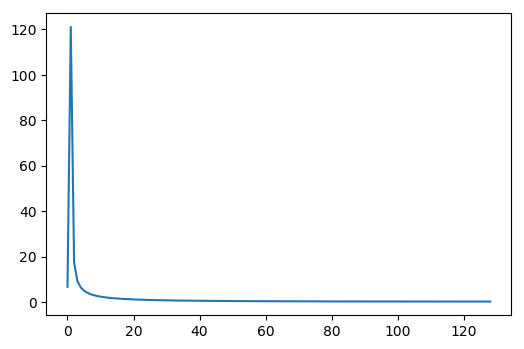

In [53]:
plot(np.abs(np.fft.rfft(x2)))

In [60]:
X = np.zeros((129,),dtype='complex')
X[1] = np.exp(1j)
X[100] = 1
x3 = np.fft.irfft(X)

In [56]:
x3.shape

(256,)

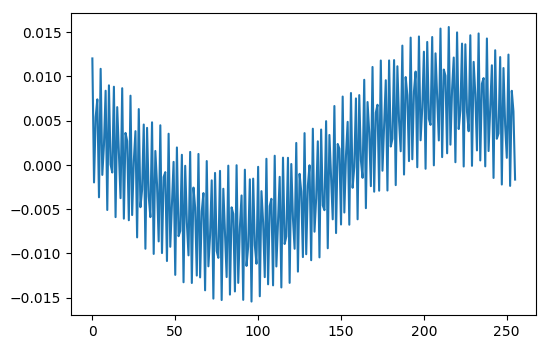

In [61]:
plot(x3)

In [62]:
ri.set_tone_bins??